***Online Retail Exploratory Data Analysis with Python***


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [44]:
#read dataset using pandas'
df = pd.read_excel('C:/Users/AdMin/OneDrive/Documents/DOCUMENT/Online Retail.xlsx')
# Display the first few rows to understand the data
df.head


<bound method NDFrame.head of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  Custom

In [32]:
df.shape

(541909, 8)

In [33]:
#information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [34]:
df.nunique

<bound method DataFrame.nunique of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  C

In [35]:
df.describe

<bound method NDFrame.describe of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  Cu

In [45]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values with 0
df.fillna(0, inplace=True)

# Verify that no missing values remain
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [46]:
# Identify rows with negative UnitPrice
negative_unitprice = df[df['UnitPrice'] < 0][['UnitPrice']]
print("Negative UnitPrice:\n", negative_unitprice)

# Convert negative UnitPrice to 0
df.loc[df['UnitPrice'] < 0, 'UnitPrice'] = 0

# Identify rows with negative Quantity
negative_quantity = df[df['Quantity'] < 0][['Quantity']]
print("Negative Quantity:\n", negative_quantity)

# Convert negative Quantity to 0
df.loc[df['Quantity'] < 0, 'Quantity'] = 0

Negative UnitPrice:
         UnitPrice
299983  -11062.06
299984  -11062.06
Negative Quantity:
         Quantity
141           -1
154           -1
235          -12
236          -24
237          -24
...          ...
540449       -11
541541        -1
541715        -5
541716        -1
541717        -5

[10624 rows x 1 columns]


In [47]:
# Check for duplicated rows
print("Number of duplicated rows:", df.duplicated().sum())

Number of duplicated rows: 5301


Outliers based on Z-Score:
         Quantity         InvoiceDate
181          432 2010-12-01 09:58:00
182          432 2010-12-01 09:58:00
730          600 2010-12-01 12:12:00
870          480 2010-12-01 12:27:00
2364         384 2010-12-01 16:22:00
...          ...                 ...
540060       324 2011-12-08 18:43:00
540061       698 2011-12-08 18:43:00
540070      1500 2011-12-08 18:45:00
540071      1200 2011-12-08 18:46:00
540421     80995 2011-12-09 09:15:00

[870 rows x 2 columns]


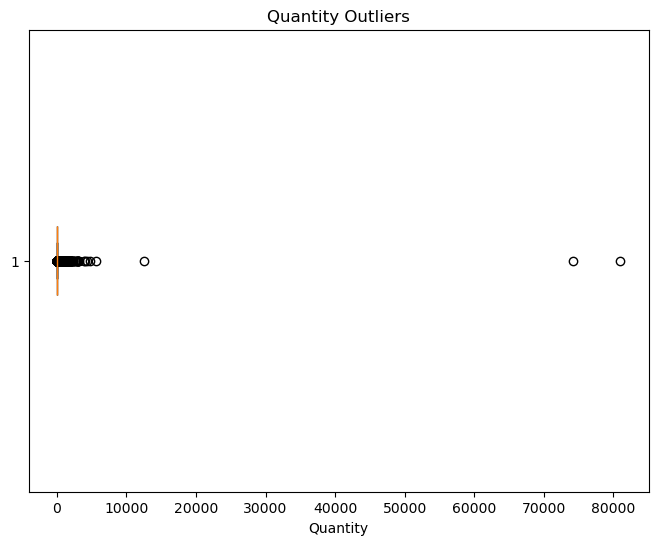

In [48]:
z_score = np.abs((df['Quantity'] - df['Quantity'].mean()) / df['Quantity'].std())
outliers = df[z_score > 2]
print("Outliers based on Z-Score:\n", outliers[['Quantity', 'InvoiceDate']])

# Visualize Quantity outliers using a box plot
plt.figure(figsize=(8,6))
plt.boxplot(df['Quantity'], vert=False, patch_artist=True)
plt.title('Quantity Outliers')
plt.xlabel('Quantity')
plt.show()

Outliers based on UnitPrice Z-Score:
         UnitPrice         InvoiceDate
1814       569.77 2010-12-01 14:32:00
3041       607.49 2010-12-01 17:06:00
4989       295.00 2010-12-02 18:06:00
5450       254.43 2010-12-03 11:13:00
5685       498.47 2010-12-03 11:28:00
...           ...                 ...
537254    1683.75 2011-12-08 10:53:00
539368     938.59 2011-12-08 16:30:00
540908     933.17 2011-12-09 10:03:00
541540    1714.17 2011-12-09 10:26:00
541541     224.69 2011-12-09 10:28:00

[595 rows x 2 columns]


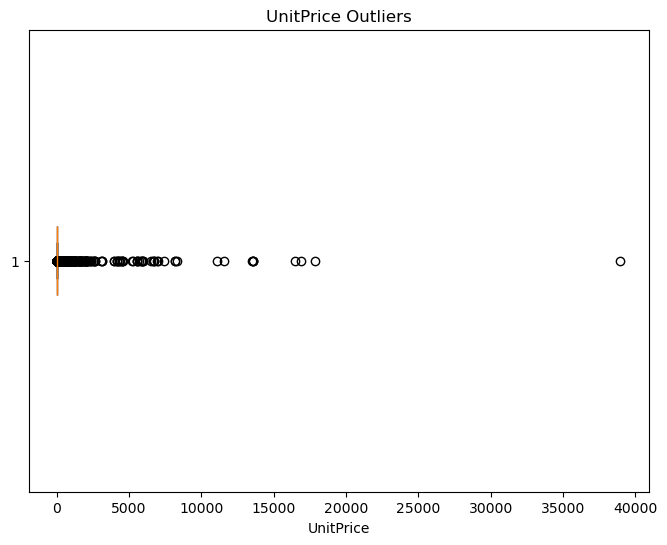

In [49]:
z_score1 = np.abs((df['UnitPrice'] - df['UnitPrice'].mean()) / df['UnitPrice'].std())
outliers1 = df[z_score1 > 2]
print("Outliers based on UnitPrice Z-Score:\n", outliers1[['UnitPrice', 'InvoiceDate']])

# Visualize UnitPrice outliers using a box plot
plt.figure(figsize=(8,6))
plt.boxplot(df['UnitPrice'], vert=False, patch_artist=True)
plt.title('UnitPrice Outliers')
plt.xlabel('UnitPrice')
plt.show()

    Month  Quantity
0       1    397716
1       2    286695
2       3    384950
3       4    312176
4       5    399425
5       6    394337
6       7    407539
7       8    425016
8       9    575416
9      10    628745
10     11    771598
11     12    677368


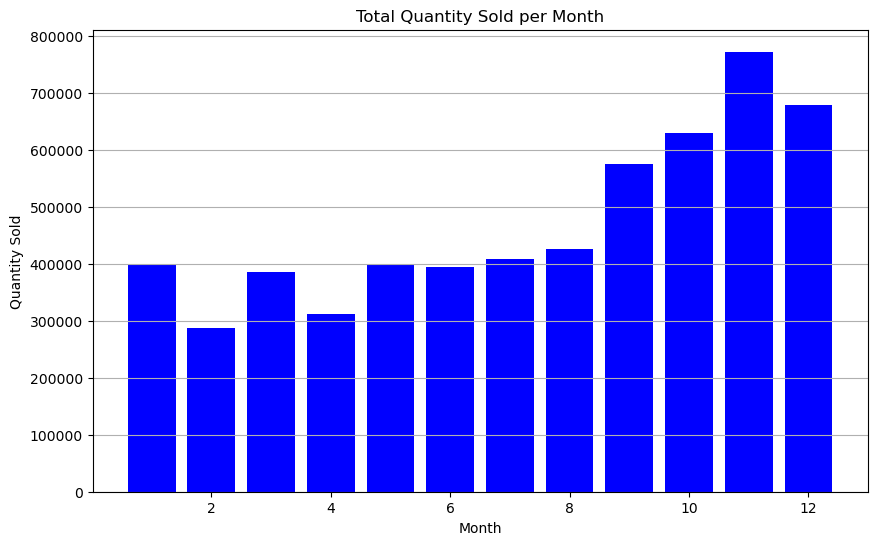

  Day of Week  Quantity
0      Friday    921005
1      Monday    880759
2      Sunday    471009
3    Thursday   1229437
4     Tuesday   1122337
5   Wednesday   1036434


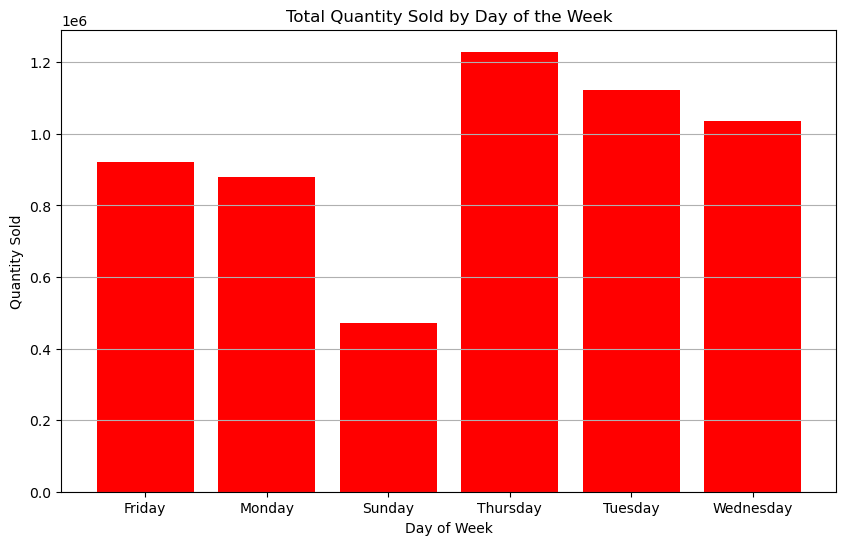

In [50]:
# Create a new column for the month of each transaction
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.month

# Group by month and sum the quantities sold
monthly_quantity = df.groupby('Month')['Quantity'].sum().reset_index()
print(monthly_quantity)

# Plot the total quantity sold per month
plt.figure(figsize=(10,6))
plt.bar(monthly_quantity['Month'], monthly_quantity['Quantity'], color='blue')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.title('Total Quantity Sold per Month')
plt.grid(axis='y')
plt.show()

# Create a new column for the day of the week
df['Day of Week'] = df['InvoiceDate'].dt.day_name()

# Group by day of the week and sum the quantities sold
day_quantity = df.groupby('Day of Week')['Quantity'].sum().reset_index()
print(day_quantity)

# Plot the total quantity sold per day of the week
plt.figure(figsize=(10,6))
plt.bar(day_quantity['Day of Week'], day_quantity['Quantity'], color='red')
plt.xlabel('Day of Week')
plt.ylabel('Quantity Sold')
plt.title('Total Quantity Sold by Day of the Week')
plt.grid(axis='y')
plt.show()